In [3]:
import serial
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib notebook


def read_arduino(ser,inputBufferSize):
#    data = ser.readline(inputBufferSize)
    data = ser.read(inputBufferSize)
    out =[(int(data[i])) for i in range(0,len(data))]
    return out

def process_data(data):
    data_in = np.array(data)
    result = []
    i = 1
    while i < len(data_in)-1:
        if data_in[i] > 127:
            # Found beginning of frame
            # Extract one sample from 2 bytes
            intout = (np.bitwise_and(data_in[i],127))*128
            i = i + 1
            intout = intout + data_in[i]
            result = np.append(result,intout)
        i=i+1
    return result

######### define FFT function first ###########

def process_gaussian_fft(t,data_t,sigma_gauss):
    nfft = len(data_t) # number of points
    dt = t[1]-t[0]  # time interval
    maxf = 1/dt     # maximum frequency
    df = 1/np.max(t)   # frequency interval
    f_fft = np.arange(-maxf/2,maxf/2+df,df)          # define frequency domain

    ## DO FFT
    data_f = np.fft.fftshift(np.fft.fft(data_t)) # FFT of data

    ## GAUSSIAN FILTER
#    sigma_gauss = 25  # width of gaussian - defined in the function
    gauss_filter = np.exp(-(f_fft)**2/sigma_gauss**2)   # gaussian filter used
    data_f_filtered= data_f*gauss_filter    # gaussian filter spectrum in frquency domain
    data_t_filtered = np.fft.ifft(np.fft.ifftshift(data_f_filtered))    # bring filtered signal in time domain
    return data_t_filtered

<IPython.core.display.Javascript object>


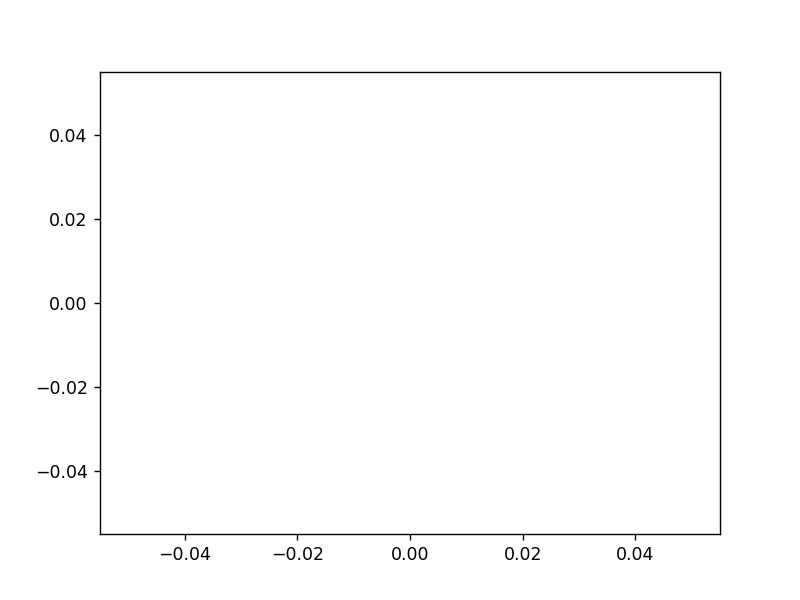

In [4]:
# Read example data
baudrate = 230400
cport = 'COM6'  # set the correct port before you run it
#cport = '/dev/tty.usbmodem141101'  # set the correct port before run it
ser = serial.Serial(port=cport, baudrate=baudrate)    
# take example data
inputBufferSize = 10000 # 20000 = 1 second
ser.timeout = inputBufferSize/20000.0  # set read timeout
#ser.set_buffer_size(rx_size = inputBufferSize)
data = read_arduino(ser,inputBufferSize)
data_plot = process_data(data)
plt.figure()
plt.plot(data_plot)
plt.show()
#ser.close()
 

<IPython.core.display.Javascript object>


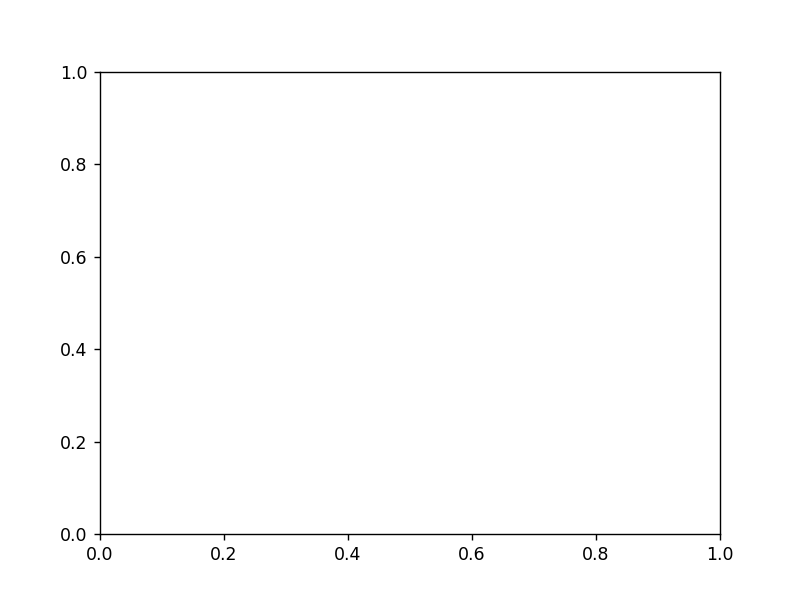

In [5]:
# this initializes the animated plot
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()



In [6]:
'''create model'''
'''
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load data from CSV files
events_df = pd.read_csv('Training_X.csv')
labels_df = pd.read_csv('Training_Y.csv')

events_df_long = pd.melt(events_df, id_vars='time', var_name='event_id', value_name='value')
events_df_long

features_df = extract_features(events_df_long, column_id='event_id', column_sort='time',
                     # we impute = remove all NaN features automatically
                     impute_function=impute)

# Merge the two dataframes based on the row number
merged_df = pd.concat([features_df, labels_df], axis=1)

# Extract features and labels
X = merged_df.drop('x', axis=1)
y = merged_df['x']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model performance
accuracy = rf.score(X_test, y_test)

'''

"\nimport pandas as pd\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import train_test_split\n\nfrom tsfresh import extract_features, extract_relevant_features, select_features\nfrom tsfresh.utilities.dataframe_functions import impute\nfrom tsfresh.feature_extraction import ComprehensiveFCParameters\n\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import classification_report\n\n# Load data from CSV files\nevents_df = pd.read_csv('Training_X.csv')\nlabels_df = pd.read_csv('Training_Y.csv')\n\nevents_df_long = pd.melt(events_df, id_vars='time', var_name='event_id', value_name='value')\nevents_df_long\n\nfeatures_df = extract_features(events_df_long, column_id='event_id', column_sort='time',\n                     # we impute = remove all NaN features automatically\n                     impute_function=impute)\n\n# Merge the two dataframes based on the row number\nmerged_df =

In [7]:
import pandas as pd

# Read X data from CSV
X = pd.read_csv('Training_X.csv')
X=X.dropna()

# Read Y data from CSV
y = pd.read_csv('Training_Y.csv')

# Print the X and Y data
# print("X data:")
# print(X.head())
# print("\nY data:")
# print(y.head())
print(X[X.isna().any(axis=1)])

from tsfresh import extract_features 
from tsfresh import extract_relevant_features
from tsfresh.feature_extraction import extract_features, EfficientFCParameters
from tsfresh.feature_extraction import MinimalFCParameters, settings
#https://tsfresh.readthedocs.io/en/latest/text/feature_extraction_settings.html

# test the default_fc_parameters change to ComprehensiveFCParameters, might have higher accuracy in the end. 
ext_feature_df = extract_features(X,column_id="Id",column_sort="Time",
                                  default_fc_parameters=EfficientFCParameters(),
                                  n_jobs=0)


Empty DataFrame
Columns: [Time, Id, Values]
Index: []


Feature Extraction: 100%|██████████| 73/73 [02:22<00:00,  1.95s/it]


In [9]:

ext_feature_df = ext_feature_df.drop(columns = "Values__query_similarity_count__query_None__threshold_0.0")
# ext_feature_df.columns[ext_feature_df.isna().any()].tolist()


KeyError: "['Values__query_similarity_count__query_None__threshold_0.0'] not found in axis"

In [10]:
import os
os.environ["SPOTIFY_CLIENT_ID"]="baebcebc2d3b4f25a2bf92baf5d21e71"
os.environ["SPOTIFY_CLIENT_SECRET"]="772edaf95fdc4db6a3b46df5fc54a4c3"


import time
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
# from scipy.io import wavfile
# import numpy as np

#spotify interface

lz_uri = 'spotify:artist:36QJpDe2go2KgaRleHCDTp'


sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id="baebcebc2d3b4f25a2bf92baf5d21e71",
                                               client_secret="772edaf95fdc4db6a3b46df5fc54a4c3",
                                               redirect_uri="http://localhost/",
                                               scope="user-modify-playback-state user-library-read user-read-currently-playing user-read-playback-state"))
print(sp)
current_playback = sp.current_playback()

def skip():
    if current_playback:
        sp.next_track()
    else:
        print("No current playback found.")

def back():
    if current_playback:
        sp.previous_track()
    else:
        print("No current playback found.")

def down():
    if current_playback:
        # print(current_playback["device"]["volume_percent"])
        if current_playback["device"]["volume_percent"] < 10:
            sp.volume(0)
        else:
            sp.volume(current_playback["device"]["volume_percent"] - 10)
        
    else:
        print("No current playback found.")

def pause():
    sp.pause_playback()

def up():
    if current_playback:
        # print(current_playback["device"]["volume_percent"])
        if current_playback["device"]["volume_percent"] > 90:
            sp.volume(100)
        else:
            sp.volume(current_playback["device"]["volume_percent"] + 10)
         
    else:
        print("No current playback found.")

def play():
    sp.start_playback()

def playpause():
    if sp.current_playback()['is_playing']:
        pause()
    else:
        play()





# while True:
#     signal = input('action? ')
#     if signal == 'quit':
#         break
#     current_playback = sp.current_playback()
#     if signal == 'blink':
#         playpause()
#     elif signal == 'L':
#         down()
#     elif signal == 'R':
#         up()
#     elif signal == 'blink twice':
#         skip()
#     elif signal == 'blink left':
#         back()



In [11]:
print(y)
from sklearn.ensemble import RandomForestClassifier
import joblib
# ext_feature_df=ext_feature_df.dropna()
rf = RandomForestClassifier()
rf.fit(ext_feature_df, y['x'])
joblib.dump(rf, "./random_forest.joblib")

print(rf)


    x
0   L
1   L
2   R
3   L
4   R
.. ..
68  R
69  R
70  L
71  L
72  R

[73 rows x 1 columns]
RandomForestClassifier()


In [12]:
rf = joblib.load("./random_forest.joblib")

<IPython.core.display.Javascript object>


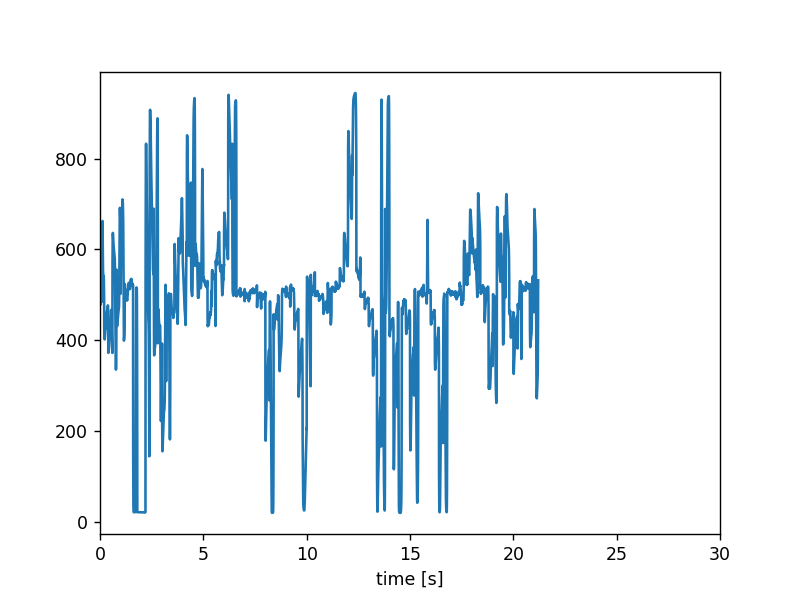

EVENT sd=164.82858250722728 t[-1]= 0.2
event_start=  0.2
CLASSIFY
3996.0


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]



end 0.5996
RIGHT
EVENT sd=47.479749134851474 t[-1]= 1.0
event_start=  1.0
CLASSIFY
3991.0


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]



end 1.3991
RIGHT
EVENT sd=62.749853754823285 t[-1]= 1.6
event_start=  1.6
CLASSIFY
9983.0


Feature Extraction: 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]



end 2.5983
RIGHT
EVENT sd=77.87807083635244 t[-1]= 3.0
event_start=  3.0
CLASSIFY
1979.0


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]



end 3.1979
RIGHT
EVENT sd=54.48454963410411 t[-1]= 3.4
event_start=  3.4
CLASSIFY
3976.0


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]



end 3.7976
RIGHT
EVENT sd=189.15869381308332 t[-1]= 4.6
event_start=  4.6
CLASSIFY
3969.0


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]



end 4.9969
RIGHT
EVENT sd=47.27593163244411 t[-1]= 5.4
event_start=  5.4
CLASSIFY
1965.0


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]



end 5.5965
RIGHT
EVENT sd=179.1019432212296 t[-1]= 6.0
event_start=  6.0
CLASSIFY
3961.0


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]



end 6.3961
RIGHT
EVENT sd=169.33283048193084 t[-1]= 6.8
event_start=  6.8
CLASSIFY
3955.0


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]



end 7.1955
RIGHT
EVENT sd=188.61175025990903 t[-1]= 7.4
event_start=  7.4
CLASSIFY
5951.0


Feature Extraction: 100%|██████████| 1/1 [00:01<00:00,  1.67s/it]



end 7.9951
RIGHT
EVENT sd=53.911728205639776 t[-1]= 9.0
event_start=  9.0
CLASSIFY
3943.0


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]



end 9.3943
LEFT
EVENT sd=81.01416289848716 t[-1]= 11.2
event_start=  11.2
CLASSIFY
5930.0


Feature Extraction: 100%|██████████| 1/1 [00:01<00:00,  1.36s/it]



end 11.793
LEFT
EVENT sd=53.96738133182254 t[-1]= 12.6
event_start=  12.6
CLASSIFY
1923.0


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]



end 12.7923
RIGHT
EVENT sd=179.4624540037119 t[-1]= 13.0
event_start=  13.0
CLASSIFY
3920.0


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]



end 13.392
LEFT
EVENT sd=178.2498345580971 t[-1]= 14.8
event_start=  14.8
CLASSIFY
3909.0


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]



end 15.1909
LEFT
EVENT sd=92.19568892681733 t[-1]= 16.4
event_start=  16.4
CLASSIFY
13894.0


Feature Extraction: 100%|██████████| 1/1 [00:03<00:00,  3.74s/it]



end 17.7894
LEFT
EVENT sd=102.46368112824624 t[-1]= 18.0
event_start=  18.0
CLASSIFY
11886.0


Feature Extraction: 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]



end 19.1886
LEFT
EVENT sd=206.30297697412698 t[-1]= 19.6
event_start=  19.6
CLASSIFY
1883.0


Feature Extraction: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]



end 19.7883
RIGHT
EVENT sd=112.41334669345558 t[-1]= 20.2
event_start=  20.2
CLASSIFY
5877.0


Feature Extraction: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]



end 20.7877
RIGHT
EVENT sd=52.82674905377506 t[-1]= 21.2
event_start=  21.2
CLASSIFY
1873.0


Feature Extraction:   0%|          | 0/1 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [16]:
# take continuous data stream 
import warnings
warnings.filterwarnings('ignore')
import statistics

'''import model '''
# import rpy2.robjects as robjects
# from rpy2.robjects.packages import importr
# randomForest =importr("randomForest")
# r = robjects.r
# model = r['readRDS']('modelRF.RData')
# predict_rf=robjects.r['predict']
# print(model)

#try 2
# model = Model().load("modelRF.RData")
# X=np.array(["10000",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
# pred = model.predict(X)


''' import spotify methods'''
# import Spootify

inputBufferSize = 4000 # keep betweein 2000-20000
ser.timeout = inputBufferSize/20000.0  # set read timeout, 20000 is one second
ser.set_buffer_size(rx_size = inputBufferSize)

%matplotlib notebook

total_time = 30.0; # time in seconds [[1 s = 20000 buffer size]]
max_time = 30; # time plotted in window [s]
N_loops = 20000.0/inputBufferSize*total_time
event_start=-1
events=[]
predicted_list=[]

T_acquire = inputBufferSize/20000.0    # length of time that data is acquired for 
N_max_loops = max_time/T_acquire    # total number of loops to cover desire time window

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
plt.ion()
fig.show()
fig.canvas.draw()

for k in range(0,int(N_loops)):
#     print(k)
    data = read_arduino(ser,inputBufferSize)
    data_temp = process_data(data)
    
    # DO THE GAUSSIAN FILTERING FIRST - OTHERWISE YOUR CODE SLOWS DOWN
    # define temporary time array OF THE WINDOW
    T = inputBufferSize/20000.0*np.linspace(0,1,len(data_temp))
    sigma_gauss = 25
    data_temp_filtered = process_gaussian_fft(T,data_temp,sigma_gauss)

    if k <= N_max_loops:
        if k==0:
            data_plot = data_temp
            data_plot_filtered = data_temp_filtered
        else:
            data_plot = np.append(data_temp,data_plot)
            data_plot_filtered = np.append(data_temp_filtered,data_plot_filtered)
#             print(len(data_temp_filtered))

        t = (min(k+1,N_max_loops))*inputBufferSize/20000.0*np.linspace(0,1,len(data_plot))
        '''detect events'''
        
        sd_threshold=35
        interval = data_temp_filtered
        midpoint = len(interval)//2
        testStat = statistics.stdev(interval.real)
        predictions_temp=None

        if (testStat > sd_threshold):
            if (event_start==-1):
                event_start=t[-1]
                print("EVENT sd="+str(testStat)+" t[-1]= "+str(t[-1]))
                print("event_start= ",event_start)
                
        '''classify'''
        if(event_start!=-1 and testStat < sd_threshold ):
            print("CLASSIFY")
            print (len(data_plot_filtered)-event_start*10000)
            events.append([event_start,t[-1]])#unsure about t

            extract_temp=pd.DataFrame()
            extract_temp['Value']=data_plot_filtered[round(event_start*10000):len(data_plot_filtered)].real.tolist()
            extract_temp["Value"].astype('float')
#             print("times",round(event_start*10000),round(t[-1]*10000))
#             print("plot len",len(data_plot_filtered))
            extract_temp['Id']=1
#             print(extract_temp)
            features_temp = extract_features(extract_temp,column_id="Id",
                                  default_fc_parameters=EfficientFCParameters(),
                                  n_jobs=0)
            features_temp = features_temp.drop(columns = "Value__query_similarity_count__query_None__threshold_0.0")
#             np.isinf(ext_feature_df)
            print()
            missing_values = features_temp.isna().any()

            # Print the columns with missing values
#             print('missing',missing_values[missing_values].index)

            predictions_temp=rf.predict(features_temp)
            predicted_list.append(predictions_temp)
            print("end",len(data_plot_filtered)/10000)
            event_start=-1        
        
        '''call spotify'''
        if predictions_temp!=None and predictions_temp=="L":
            print("LEFT")
            current_playback = sp.current_playback()
            if current_playback:
                sp.next_track()
            else:
                print("No current playback found.")
        elif predictions_temp!=None and predictions_temp=="R":
            print("RIGHT")
            current_playback = sp.current_playback()
            if current_playback:
                sp.previous_track()
            else:
                print("No current playback found.")
        
    
        
        

        
    else:
        data_plot = np.roll(data_plot,len(data_temp))
        data_plot[0:len(data_temp)] = data_temp
        
        data_plot_filtered = np.roll(data_plot_filtered,len(data_temp_filtered))
        data_plot_filtered[0:len(data_temp_filtered)] = data_temp_filtered
        
    t = (min(k+1,N_max_loops))*inputBufferSize/20000.0*np.linspace(0,1,len(data_plot))
    t_filtered = (min(k+1,N_max_loops))*inputBufferSize/20000.0*np.linspace(0,1,len(data_plot_filtered))

    # same thing here

    plt.xlim([0,max_time])
    ax1.clear()
    ax1.set_xlim(0, max_time)
    plt.xlabel('time [s]')
    ax1.plot(t_filtered,data_plot_filtered)
    fig.canvas.draw()    
    plt.show()
    
   
    


In [ ]:
# save the plot above when ready
name_of_file = 'example_file.txt'
np.savetxt(name_of_file, np.c_[t, np.real(data_plot)])

# load the above if needed
temp = np.loadtxt(name_of_file)
plt.figure()
plt.plot(temp[:,0],temp[:,1])
plt.plot(temp[:,2],temp[:,3])
plt.show()

In [ ]:
# close serial port if necessary
if ser.read():
    ser.flushInput()
    ser.flushOutput()
    ser.close()

In [3]:
pip install tsfresh


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: joblib>=0.11 in c:\users\rishad\anaconda3\lib\site-packages (from scikit-learn>=0.22.0->tsfresh) (1.1.0)
  Using cached packaging-23.1-py3-none-any.whl (48 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2



In [ ]:
print(len(data_plot_filtered))